____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Docente: Martin Palazzo__\
__Ciencia de Datos - Curso I5521 - Turno Sabado Mañana__
____

In [ ]:
print(__doc__)


# Code intially obtained from 
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# This version has been modified and adapted by Martin Palazzo for the ClusterAI 2020 course.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression

def classifiers_moons(dset = 'moons', test_frac = 0.4, param_c = 0.1, param_gamma = 2, lr_penalization = None):

  h = .02  # step size in the mesh

  names = ["Linear SVM", "RBF SVM", "Logistic Regression"]

  classifiers = [
      SVC(kernel="linear", C=param_c),
      SVC(gamma=param_gamma, C=param_c),
      LogisticRegression(C = param_c , penalty = lr_penalization )]

  X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                            random_state=1, n_clusters_per_class=2)
  rng = np.random.RandomState(2)
  X += 2 * rng.uniform(size=X.shape)
  linearly_separable = (X, y)

  if dset == 'moons':
    datasets = [make_moons(noise=0.2, random_state=10,n_samples=200)]
  elif dset == 'circles':
    datasets = [make_circles(noise=0.2, factor=0.5, random_state=1, n_samples = 200)]
  elif dset == 'lin_sep':
    datasets = [linearly_separable]

  figure = plt.figure(figsize=(27, 9))
  i = 1
  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):
      # preprocess dataset, split into training and test part
      X, y = ds
      X = StandardScaler().fit_transform(X)
      X_train, X_test, y_train, y_test = \
          train_test_split(X, y, test_size=test_frac, random_state=42)

      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))

      # just plot the dataset first
      cm = plt.cm.RdBu
      cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
      if ds_cnt == 0:
          ax.set_title("Input data")
      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k', s = 150)
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                edgecolors='k', s = 150, marker =  '^')
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
      i += 1

      # iterate over classifiers
      for name, clf in zip(names, classifiers):
          ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)
          score_tr = clf.score(X_train, y_train)

          # Plot the decision boundary. For that, we will assign a color to each
          # point in the mesh [x_min, x_max]x[y_min, y_max].
          if hasattr(clf, "decision_function"):
              Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
          else:
              Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

          # Put the result into a color plot
          Z = Z.reshape(xx.shape)
          ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

          # Plot the training points
          ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                    edgecolors='k', s = 150)
          # Plot the testing points
          ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                    edgecolors='k', alpha=0.8, s = 150, marker =  '^')

          ax.set_xlim(xx.min(), xx.max())
          ax.set_ylim(yy.min(), yy.max())
          ax.set_xticks(())
          ax.set_yticks(())
          if ds_cnt == 0:
              ax.set_title(name)
          ax.text(xx.max() - .3, yy.min() + .10, ('Test acc.%.2f' % score).lstrip('0'),
                  size=35, horizontalalignment='right')
          
          ax.text(xx.max() - .3, yy.min() + .45, ('Train acc.%.2f' % score_tr).lstrip('0'),
                  size=35, horizontalalignment='right')
          i += 1

  plt.tight_layout()
  plt.show()

Automatically created module for IPython interactive environment


____
__Dataset: Moons__\
__Regularization: Low__
____

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


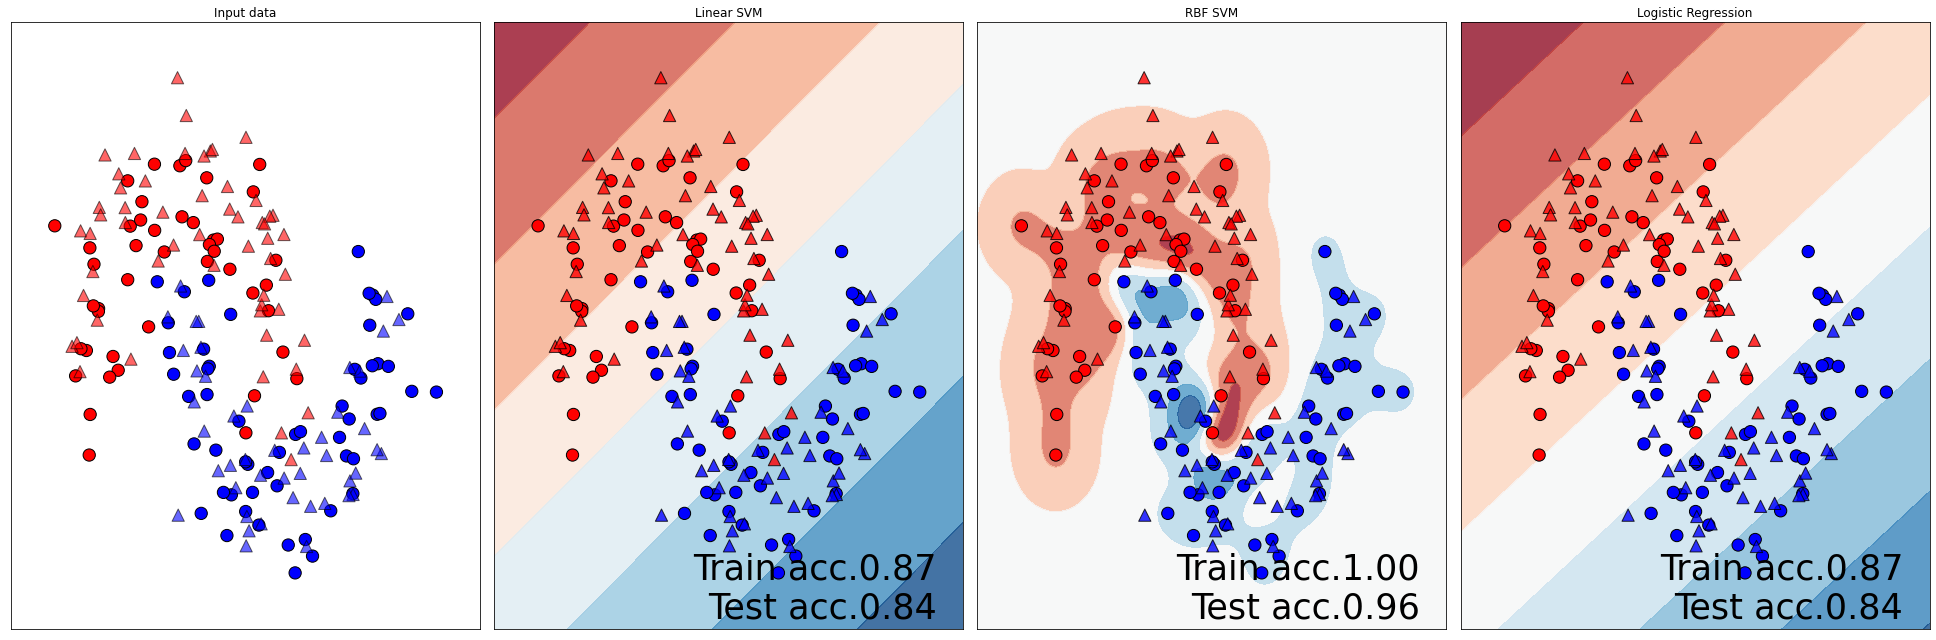

In [ ]:
classifiers_moons(dset= 'moons',  test_frac= 0.5, param_c = 100, param_gamma = 10, lr_penalization = 'none')

____
__Dataset: Moons__\
__Regularization: Mid__
____

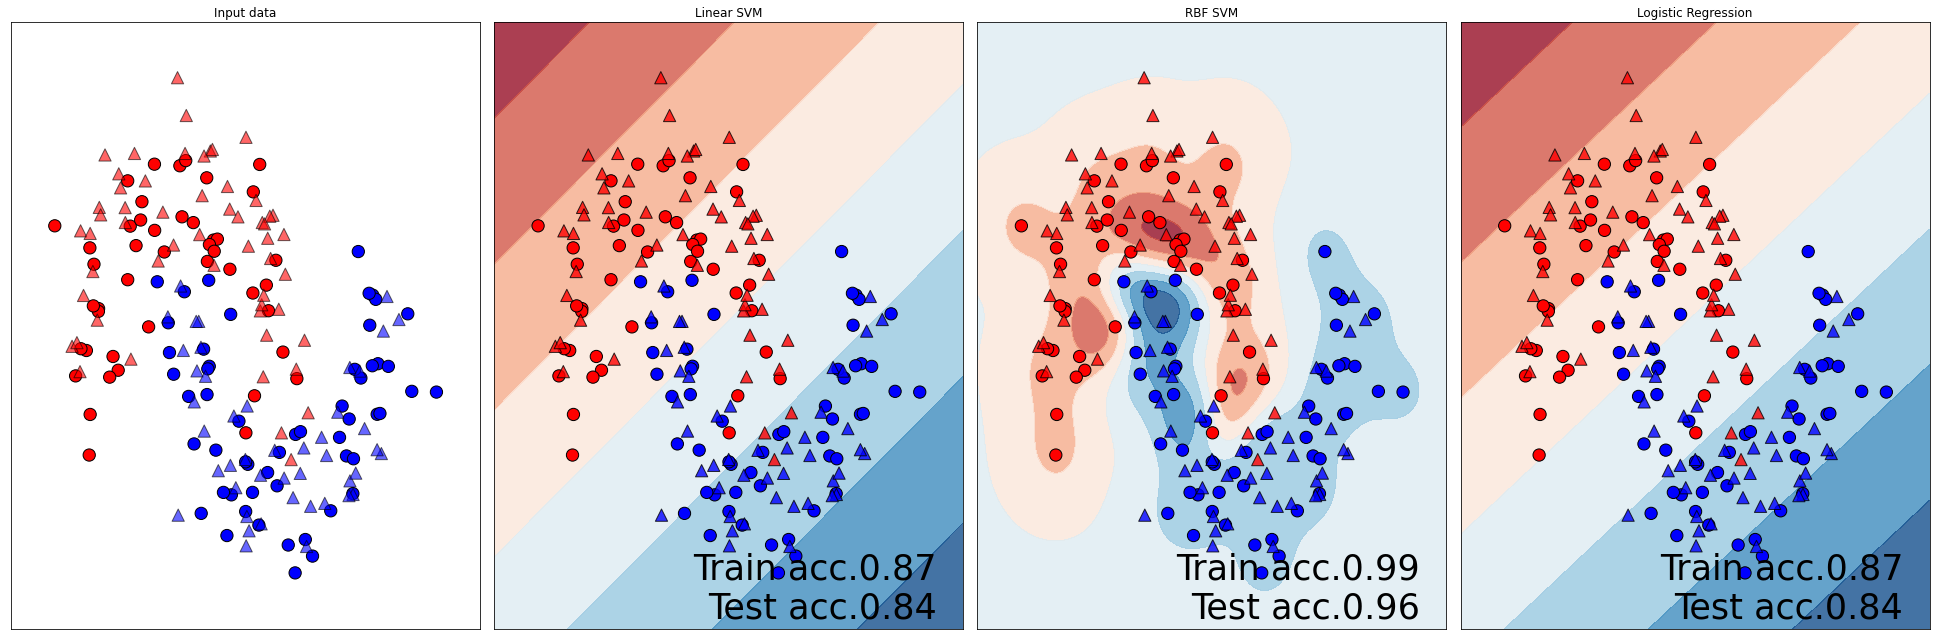

In [ ]:
classifiers_moons( dset= 'moons', test_frac= 0.5, param_c = 10, param_gamma = 5, lr_penalization = 'l2')

____
__Dataset: Moons__\
__Regularization: High__
____

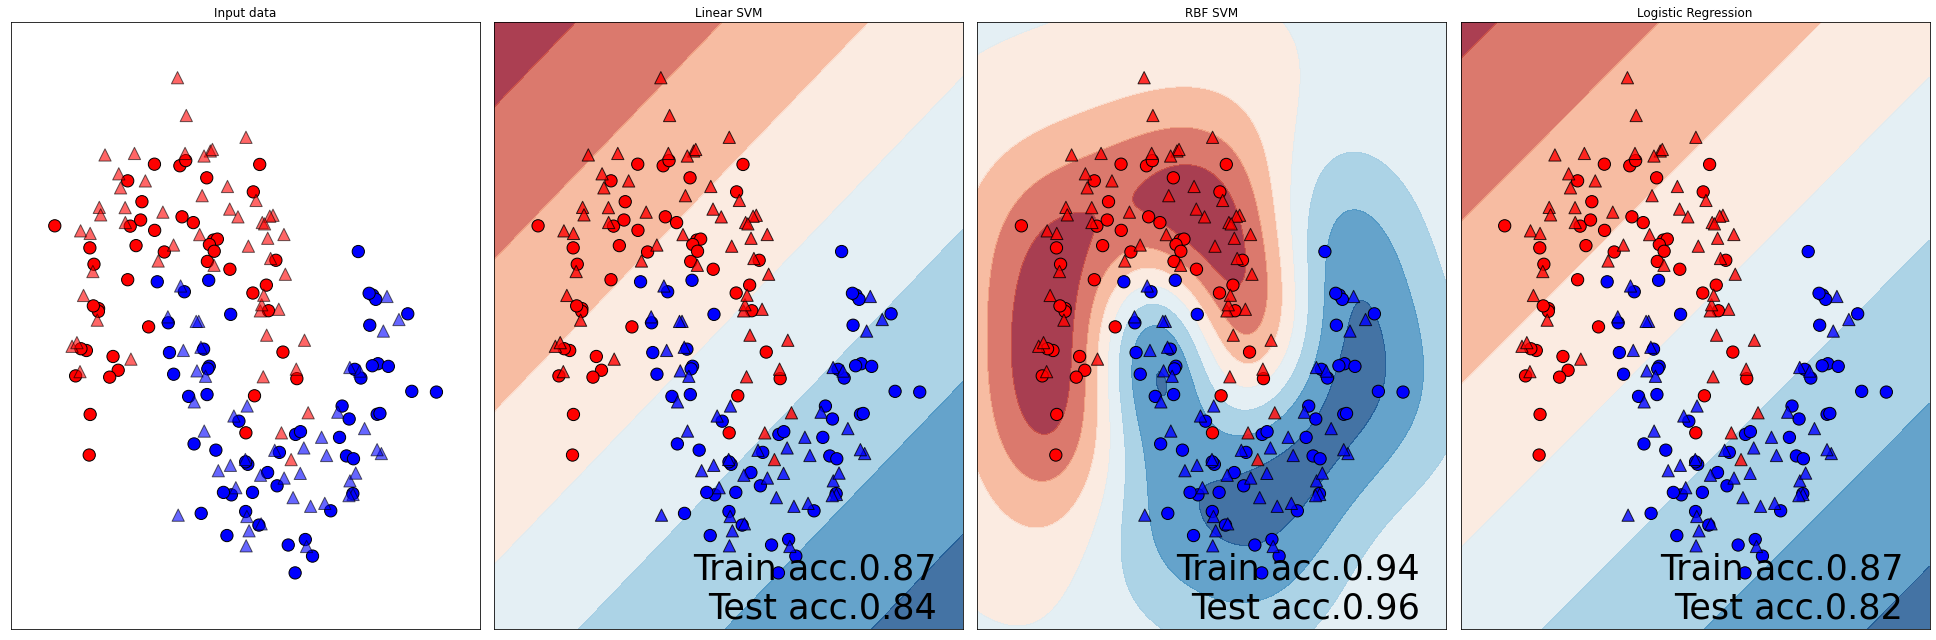

In [ ]:
classifiers_moons( dset= 'moons', test_frac= 0.5, param_c = 1, param_gamma = 1, lr_penalization = 'l2')

____
__Dataset: Circles__\
__Regularization: Low__
____

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


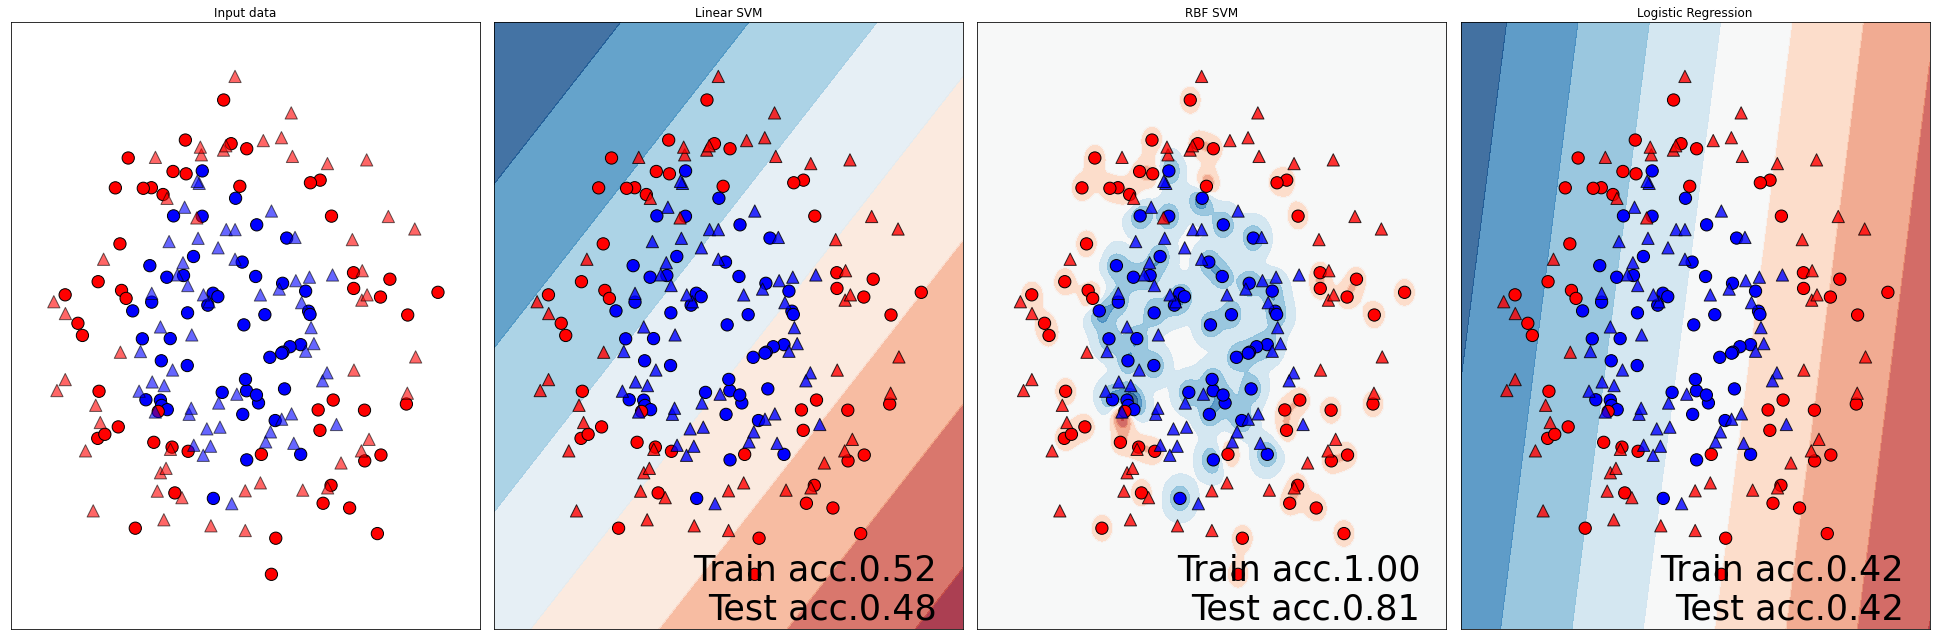

In [ ]:
classifiers_moons( dset= 'circles', test_frac= 0.5, param_c = 100, param_gamma = 50, lr_penalization = 'none')

____
__Dataset: Circles__\
__Regularization: Mid__
____

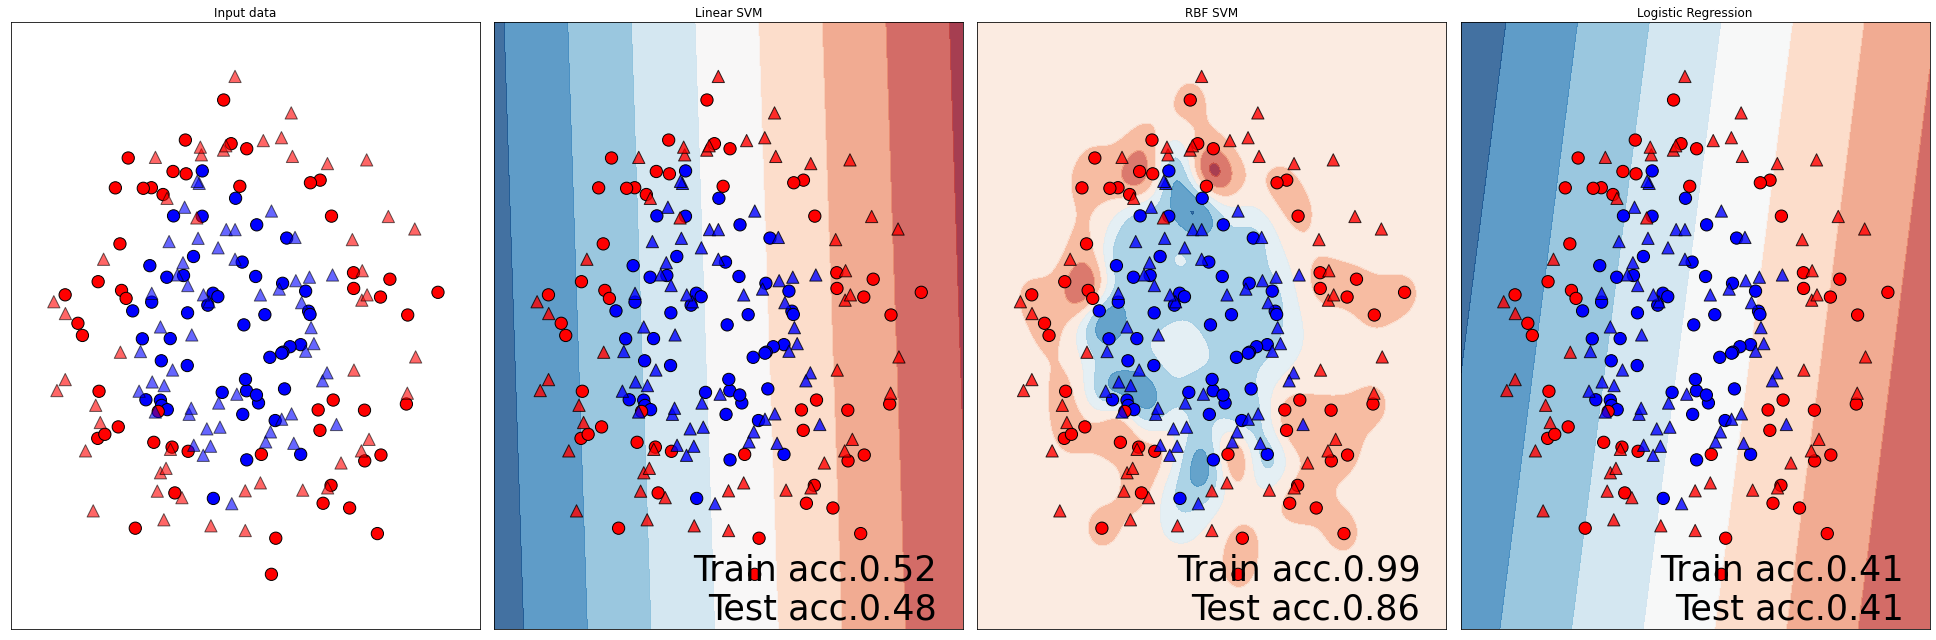

In [ ]:
classifiers_moons( dset= 'circles', test_frac= 0.5, param_c = 10, param_gamma = 10, lr_penalization = 'l2')

____
__Dataset: Circles__\
__Regularization: High__
____

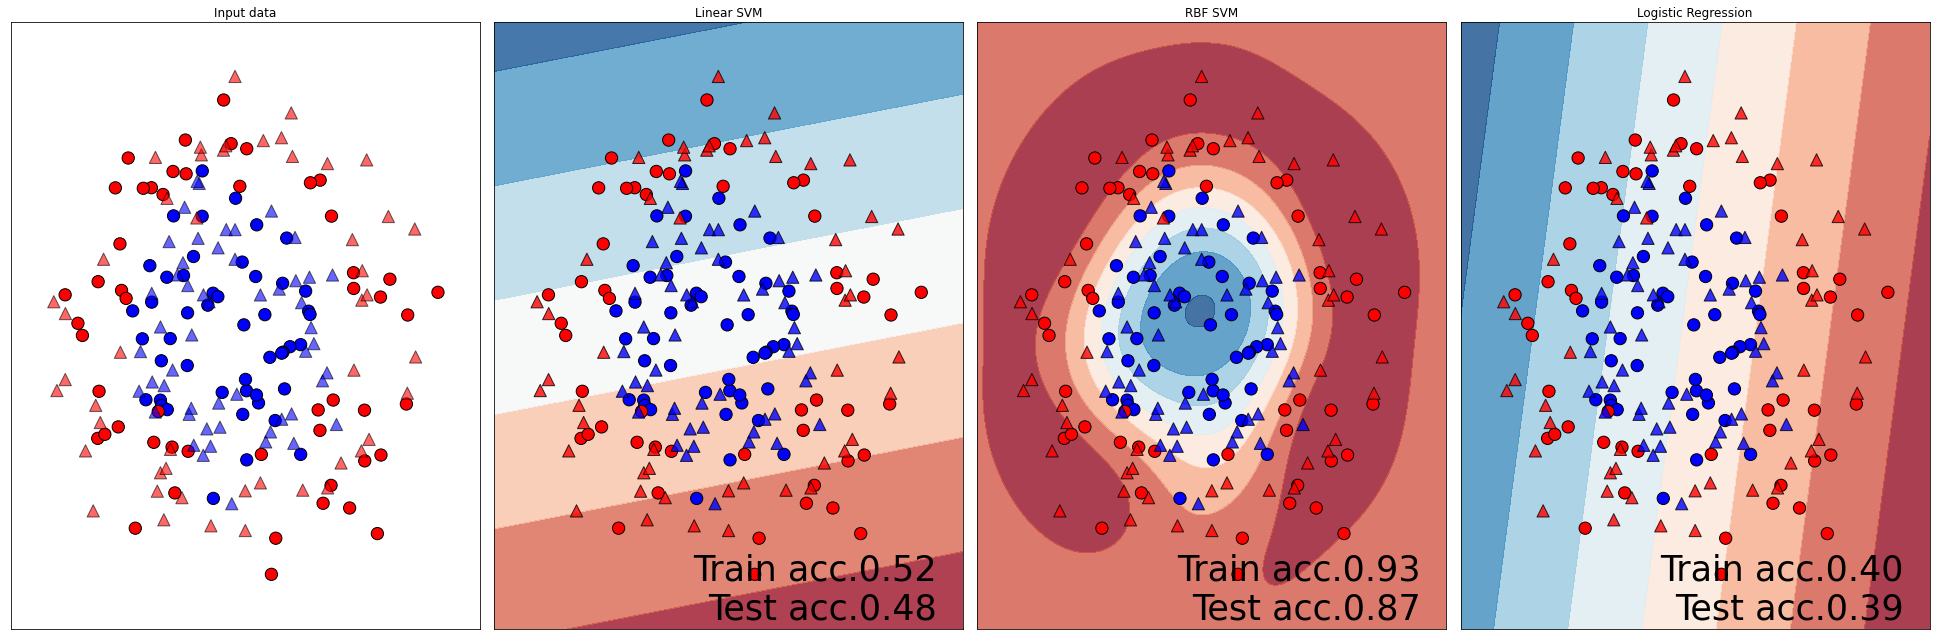

In [ ]:
classifiers_moons( dset= 'circles', test_frac= 0.5, param_c = 1, param_gamma = 1, lr_penalization = 'l2')

____
__Dataset: Circles__\
__Regularization: High__
____

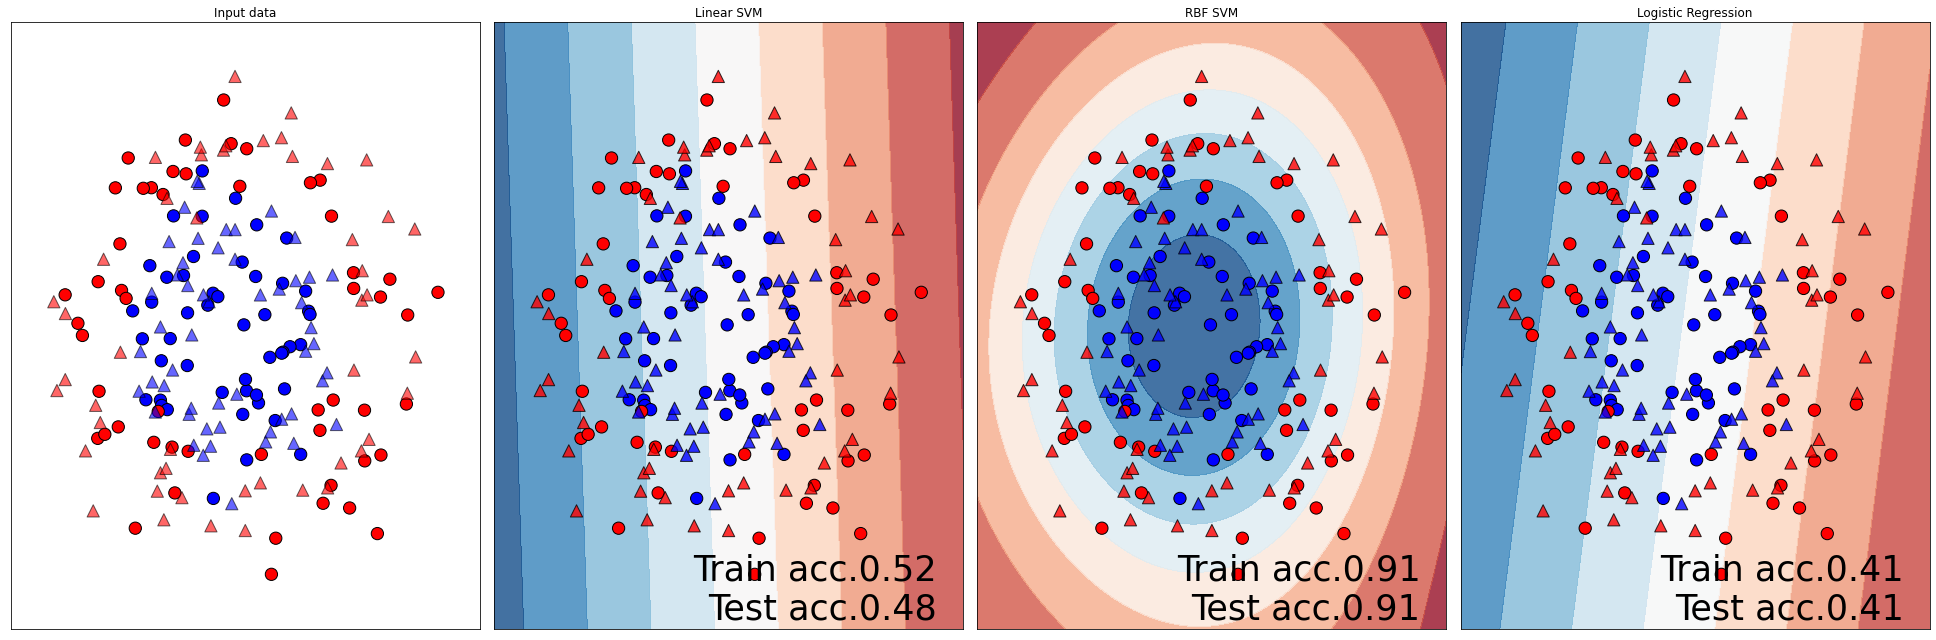

In [ ]:
classifiers_moons( dset= 'circles', test_frac= 0.5, param_c = 10, param_gamma = 0.1, lr_penalization = 'l2')

____
__Dataset: Linearly separable__\
__Regularization: Low__
____

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


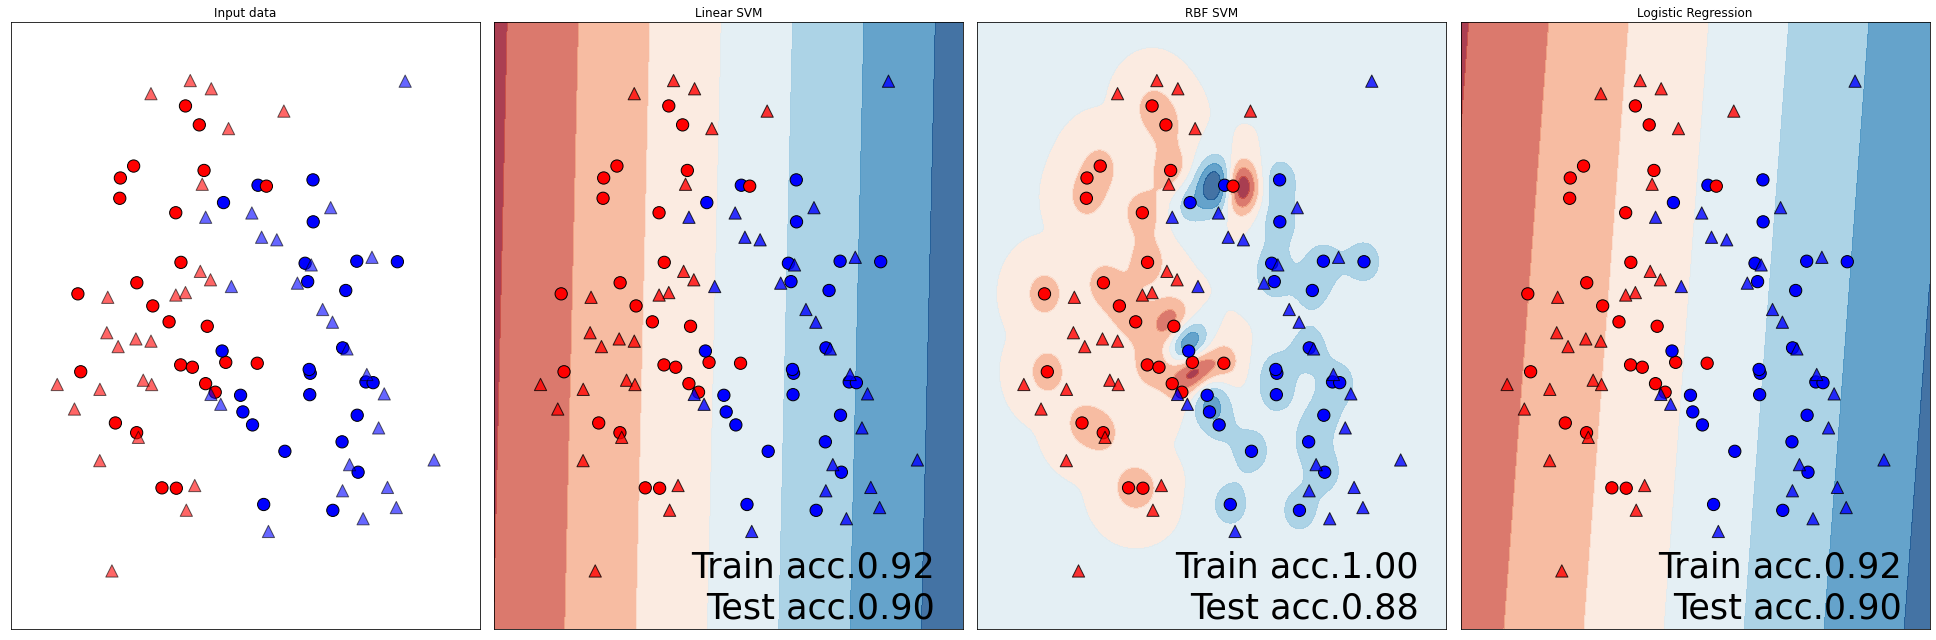

In [ ]:
classifiers_moons( dset= 'lin_sep', test_frac= 0.5, param_c = 100, param_gamma = 20, lr_penalization = 'none')

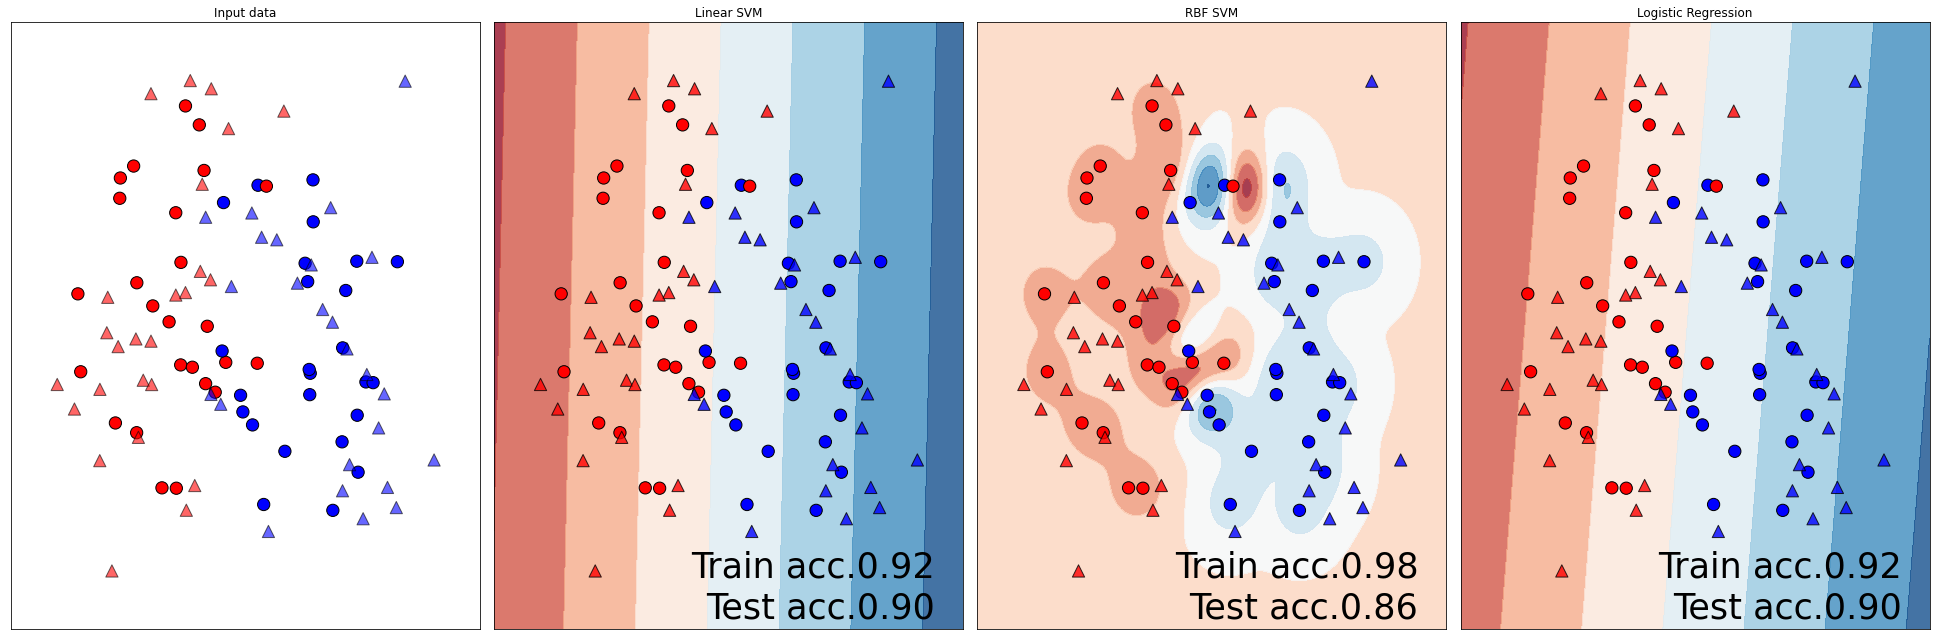

In [ ]:
classifiers_moons( dset= 'lin_sep', test_frac= 0.5, param_c = 10, param_gamma = 10, lr_penalization = 'l2')

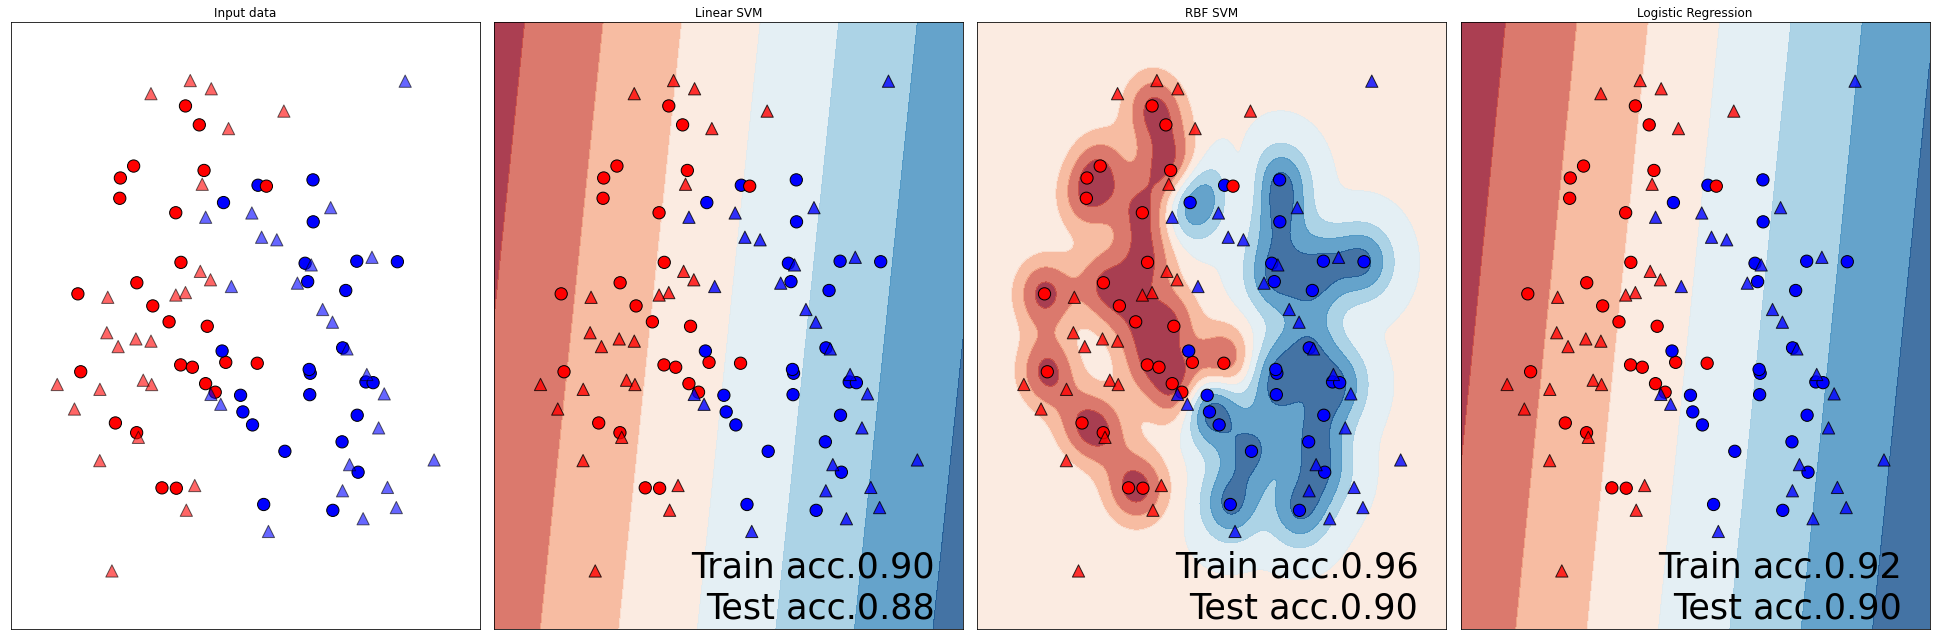

In [ ]:
classifiers_moons( dset= 'lin_sep', test_frac= 0.5, param_c = 1, param_gamma = 10, lr_penalization = 'l2')

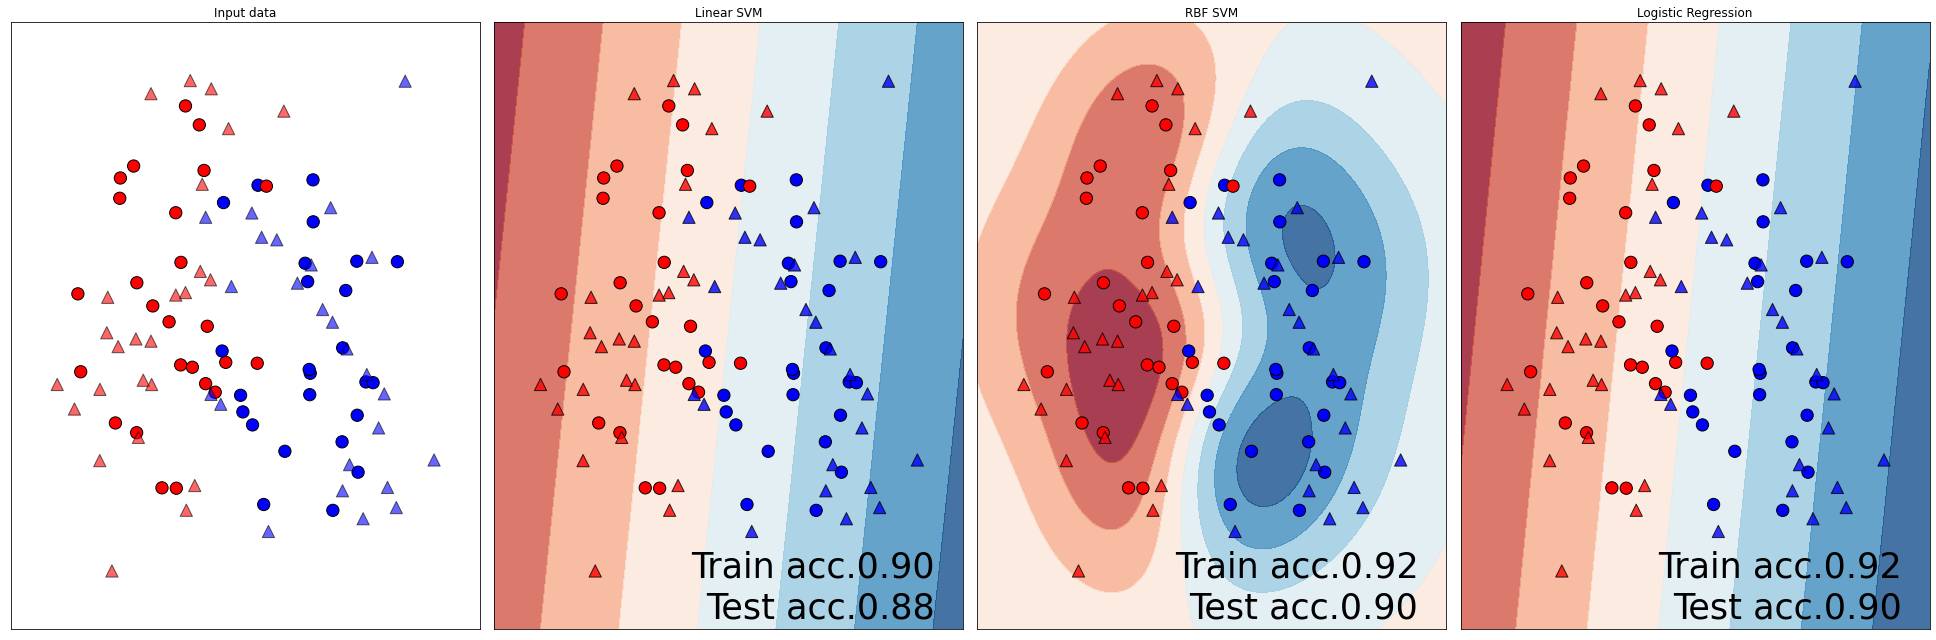

In [ ]:
classifiers_moons( dset= 'lin_sep', test_frac= 0.5, param_c = 1, param_gamma = 1, lr_penalization = 'l2')

# **Breast Cancer Classification**

In [ ]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
y = data.target
x0 = pd.DataFrame(data.data)
#breast = pd.read_csv('/Users/palazzom/Dropbox/clusterai/clases/2019/clase_03/clusterai_2019_clase03_dataset_breast_wisconsin.csv', delimiter=';')


In [ ]:
# imprimo en pantalla las labels
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Arbitrariamente decidimos usar las features 2,3 y 4.

In [ ]:
x = x0.iloc[:,2:5]

Visualizamos como se co-distribuyen cada par de features en nuestro dataset.

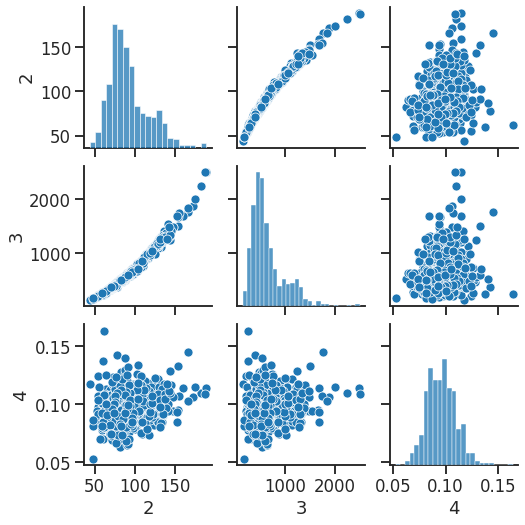

In [ ]:


sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")

sns.pairplot(x)
plt.show()

## Separo mi dataset en Train y Test
Con la funcion "train_test_split" de sklearn separaremos nuestro dataset (tanto x como y) en dos sets de entrenamiento y prueba independiente. Podemos elegir que % de muestras esten en cada conjunto. El random_state sirve para que pueda reproducirse la "aleatoriedad" de division de muestras en el futuro. 

In [ ]:
# obtenemos xtrain, xtest, ytrain e ytest :) 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.9, random_state=4)

In [ ]:
# observamos como queda la matriz de xtrain
xtrain.shape

(56, 3)

In [ ]:
# observamos como queda la matriz de xtest
xtest.shape

(513, 3)

## Auto-Scaling utilizando muestras de train 
Queremos dejar todas las features en los mismos rangos por eso utilizaremos el standard scaler para que queden con media 0 y desvio standard 1.

In [ ]:
# auto scaling train- set (mean = 0, std = 1)
# ver que en la misma linea creamos el standard scaler y lo "fiteamos" al mismo tiempo con "xtrain"
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# xtrain_scal tendra el dataset de train pre-procesado con el standard scaler
xtrain_scal = scaler.transform(xtrain)  
# para cada feature imprimimos la media y el desvio standard obtenido. Ver que media = 0 y stdev = 1.
print(xtrain_scal.mean(axis=0))
print(xtrain_scal.std(axis=0))

[-1.26882631e-16  2.53765263e-16 -8.16806940e-16]
[1. 1. 1.]


In [ ]:
# utilizando el scaler "fiteado" o "ajustado" a los datos de train, aplicamos el scaler a los datos de test.
# obtenemos "xtest_scal" 
xtest_scal = scaler.transform(xtest)  
# obviamente la media y stdev de las features en test no seran 0 y 1 ya que el scaler se ajusto con train unicamente.
print(xtest_scal.mean(axis=0))
print(xtest_scal.std(axis=0))

[-0.1267567  -0.12264697 -0.05228972]
[0.90315813 0.94998082 1.00294979]


## **Clasificacion con SVM**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
svc = svm.SVC(probability=True)
clf_svm = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)

In [ ]:
# Ejercicio 01: ajustar el modelo declarado en el paso anterior a los datos de entrenamiento.

clf_svm.fit( #### CODIGO AQUI ####)

SyntaxError: ignored

In [ ]:
# con .best_estimator_ obtenemos los mejores hiperparametros aprendidos por grid search cross validation
clf_svm.best_estimator_

In [ ]:
# con .cv_results_ sobre el modelo entrenado obtenemos los valores de cada combinacion de hiperparametros en cross validation
clf_svm.cv_results_

In [ ]:
# con .predict sobre los datos de test obtenemos y' , es decir las etiquetas que nuestro modelo entrenado predice sobre nuevos datos de test
ypred_svm = clf_svm.predict(xtest_scal)

In [ ]:
# con accuracy_score calculamos el accuracy entre las verdaderas etiquetas y las etiquetas estimadas
acc_te_svm = accuracy_score( #### CODIGO AQUI ####)
acc_te_svm

In [ ]:
# Compute confusion Matrix entre las etiquetas estimadas y las etiquetas reales
cm_svm = confusion_matrix(ytest, ypred_svm)
cm_svm

In [ ]:
df_cm = pd.DataFrame(cm_svm, index = ['Cancer', 'Control'], columns = ['Cancer', 'Control'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

In [ ]:
# compute and plot AUC
ypred_svm_proba = clf_svm.predict_proba(xtest_scal)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), ypred_svm_proba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

In [ ]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()

## **Tarea**: 
realizar el mismo procedimiento con Logistic Regression. Revisar en la documentacion oficial de scikit-learn que hiperparametros deben ser ingresados para gridsearch cross validation. Comparar los resultados con SVM.

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters = {'C':[1, 10, 100, 1000]}
lr_model = LogisticRegression(random_state=0, solver='lbfgs')
clf_lr = GridSearchCV(lr_model, param_grid = parameters, refit = True, cv = 5)